In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

In [ ]:
Msc_asia_data = pd.read_csv('/content/Msc_data_asia.csv')

In [ ]:
Msc_asia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250071 entries, 0 to 250070
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          250071 non-null  int64 
 1   measure__sid                             250071 non-null  int64 
 2   measure__type__description               250071 non-null  object
 3   commodity__indent                        250071 non-null  int64 
 4   commodity__suffix                        250071 non-null  int64 
 5   commodity__validity_start                250071 non-null  object
 6   commodity__sid                           250071 non-null  int64 
 7   commodity__description                   250071 non-null  object
 8   measure__geographical_area__sid          250071 non-null  int64 
 9   measure__geographical_area__description  250071 non-null  object
 10  measure__duty_expression                 250

In [ ]:
Msc_asia_data.head()

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description,measure__geographical_area__sid,measure__geographical_area__description,measure__duty_expression
0,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,111,Georgia,0%
1,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,334,Israel,0%
2,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,444,Jordan,0%
3,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,156,Japan,0%
4,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,273,South Korea,0%


In [ ]:
Msc_asia_data['measure__geographical_area__description'].unique()

array(['Georgia', 'Israel', 'Jordan', 'Japan', 'South Korea', 'Lebanon',
       'Singapore', 'Turkey', 'Vietnam', 'Thailand', 'China', 'Indonesia',
       'India'], dtype=object)

In [ ]:
Msc_asia_data['commodity__code'] = Msc_asia_data['commodity__code'].astype('int32')
Msc_asia_data['measure__sid'] = Msc_asia_data['measure__sid'].astype('int32')
Msc_asia_data['commodity__indent'] = Msc_asia_data['commodity__indent'].astype('int32')
Msc_asia_data['commodity__suffix'] = Msc_asia_data['commodity__suffix'].astype('int32')
Msc_asia_data['commodity__sid'] = Msc_asia_data['commodity__sid'].astype('int32')
Msc_asia_data['measure__geographical_area__sid'] = Msc_asia_data['measure__geographical_area__sid'].astype('int32')
Msc_asia_data['measure__duty_expression'] = Msc_asia_data['measure__duty_expression'].astype('str')

In [ ]:
Msc_asia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250071 entries, 0 to 250070
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          250071 non-null  int32 
 1   measure__sid                             250071 non-null  int32 
 2   measure__type__description               250071 non-null  object
 3   commodity__indent                        250071 non-null  int32 
 4   commodity__suffix                        250071 non-null  int32 
 5   commodity__validity_start                250071 non-null  object
 6   commodity__sid                           250071 non-null  int32 
 7   commodity__description                   250071 non-null  object
 8   measure__geographical_area__sid          250071 non-null  int32 
 9   measure__geographical_area__description  250071 non-null  object
 10  measure__duty_expression                 250

In [ ]:
# Extract and convert percentages, ignoring non-percentage components
Msc_asia_data['measure__duty_expression'] = (
    Msc_asia_data['measure__duty_expression']
    .str.extract(r'(\d+)%')  # Extract the number before '%'
    .astype(float) / 100  # Convert to float, handle non-numeric with 'ignore'
).fillna(0)

In [ ]:
Msc_asia_data['measure__duty_expression'].unique()

array([0.  , 0.07, 0.01, 0.04, 0.03, 0.05, 0.06, 0.09, 0.08, 0.1 , 0.02,
       0.18, 0.28])

In [ ]:

Msc_asia_data['commodity__validity_start'] = pd.to_datetime(Msc_asia_data['commodity__validity_start'])

In [ ]:

Msc_asia_data['commodity__validity_year'] = pd.to_datetime(Msc_asia_data['commodity__validity_start']).dt.year



In [ ]:
Msc_asia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250071 entries, 0 to 250070
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   commodity__code                          250071 non-null  int32         
 1   measure__sid                             250071 non-null  int32         
 2   measure__type__description               250071 non-null  object        
 3   commodity__indent                        250071 non-null  int32         
 4   commodity__suffix                        250071 non-null  int32         
 5   commodity__validity_start                250071 non-null  datetime64[ns]
 6   commodity__sid                           250071 non-null  int32         
 7   commodity__description                   250071 non-null  object        
 8   measure__geographical_area__sid          250071 non-null  int32         
 9   measure__geographical_area

In [ ]:
Msc_asia_data['measure__geographical_area__description'].unique()

array(['Georgia', 'Israel', 'Jordan', 'Japan', 'South Korea', 'Lebanon',
       'Singapore', 'Turkey', 'Vietnam', 'Thailand', 'China', 'Indonesia',
       'India'], dtype=object)

In [ ]:

Msc_asia_trade_india = Msc_asia_data[Msc_asia_data['measure__geographical_area__description'].isin(['India', 'China', 'Japan', 'South Korea'])]


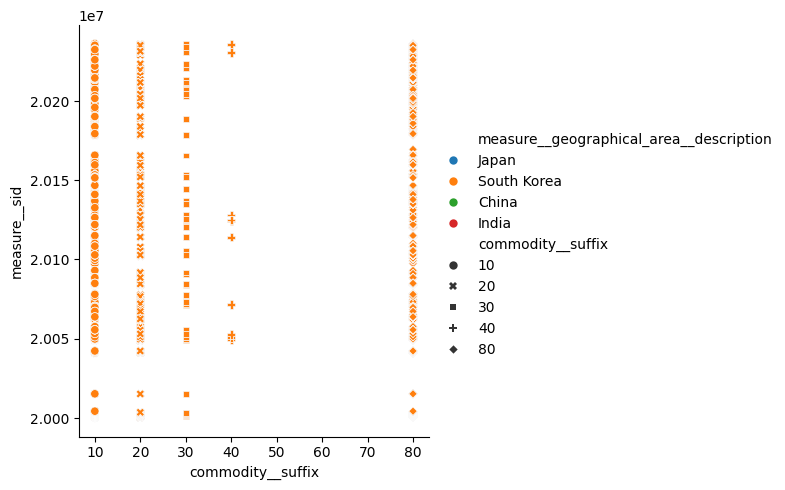

In [ ]:

sns.relplot(data = Msc_asia_trade_india, kind = 'scatter', x = 'commodity__suffix', y = 'measure__sid', hue = 'measure__geographical_area__description', style = 'commodity__suffix' )

(array([68922.,     0.,     0.,  1263., 20310., 13852., 10852., 78402.,
        36028., 20442.]),
 array([1972. , 1977.2, 1982.4, 1987.6, 1992.8, 1998. , 2003.2, 2008.4,
        2013.6, 2018.8, 2024. ]),
 <BarContainer object of 10 artists>)

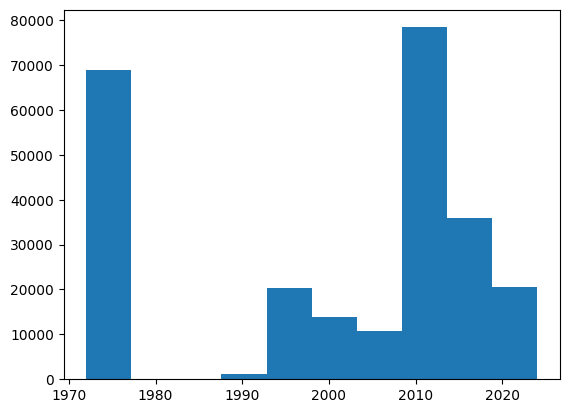

In [ ]:
plt.hist(Msc_asia_data['commodity__validity_year'])

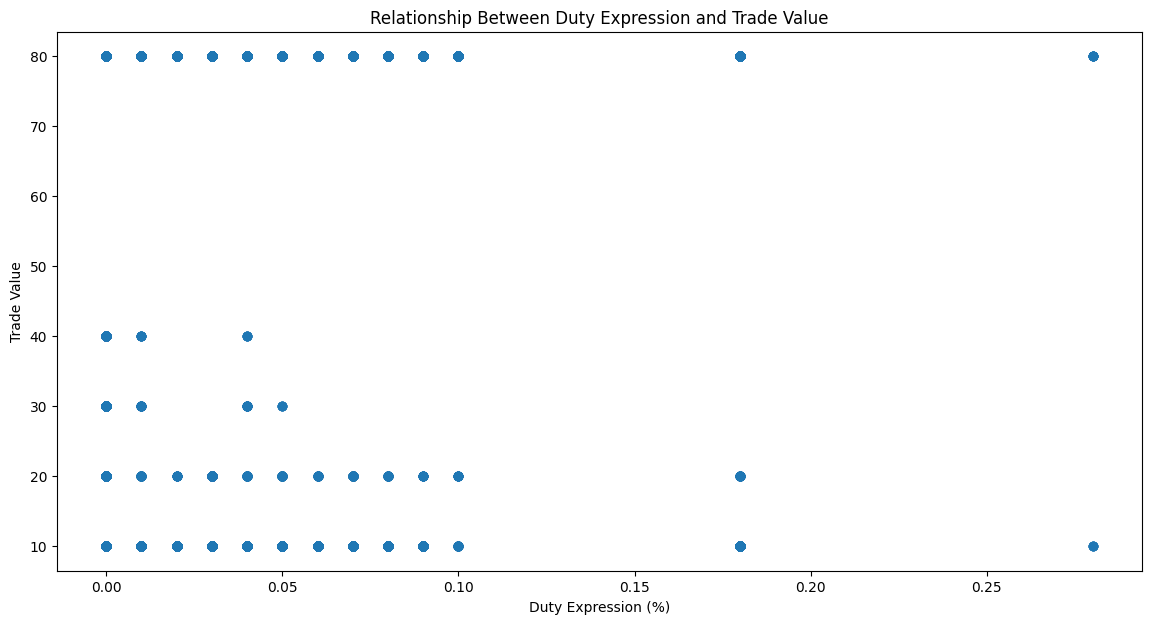

In [ ]:
# Scatter Plot - Relationship between trade value and another metric (e.g., duty expression)
plt.figure(figsize=(14, 7))
plt.scatter(Msc_asia_data['measure__duty_expression'], Msc_asia_data['commodity__suffix'])
plt.title('Relationship Between Duty Expression and Trade Value')
plt.xlabel('Duty Expression (%)')
plt.ylabel('Trade Value')
plt.show()

<Axes: >

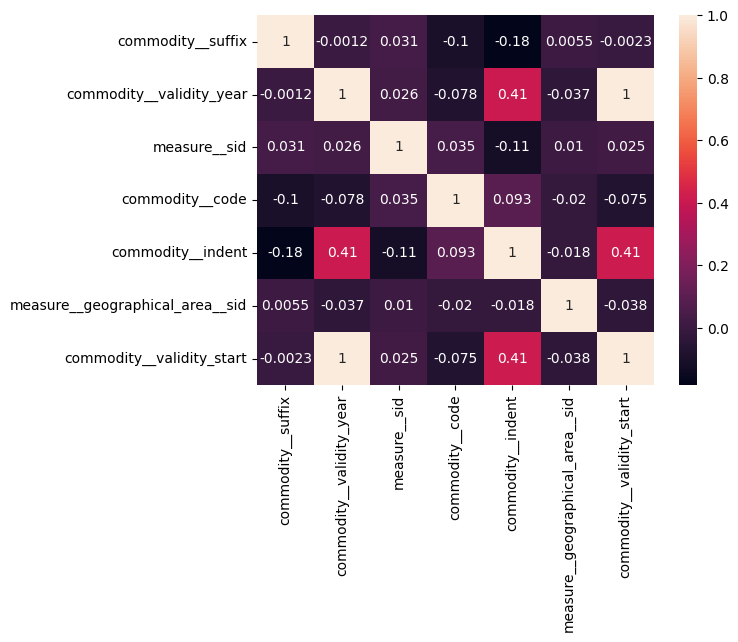

In [ ]:

sns.heatmap(Msc_asia_data[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']].corr(),annot = True)

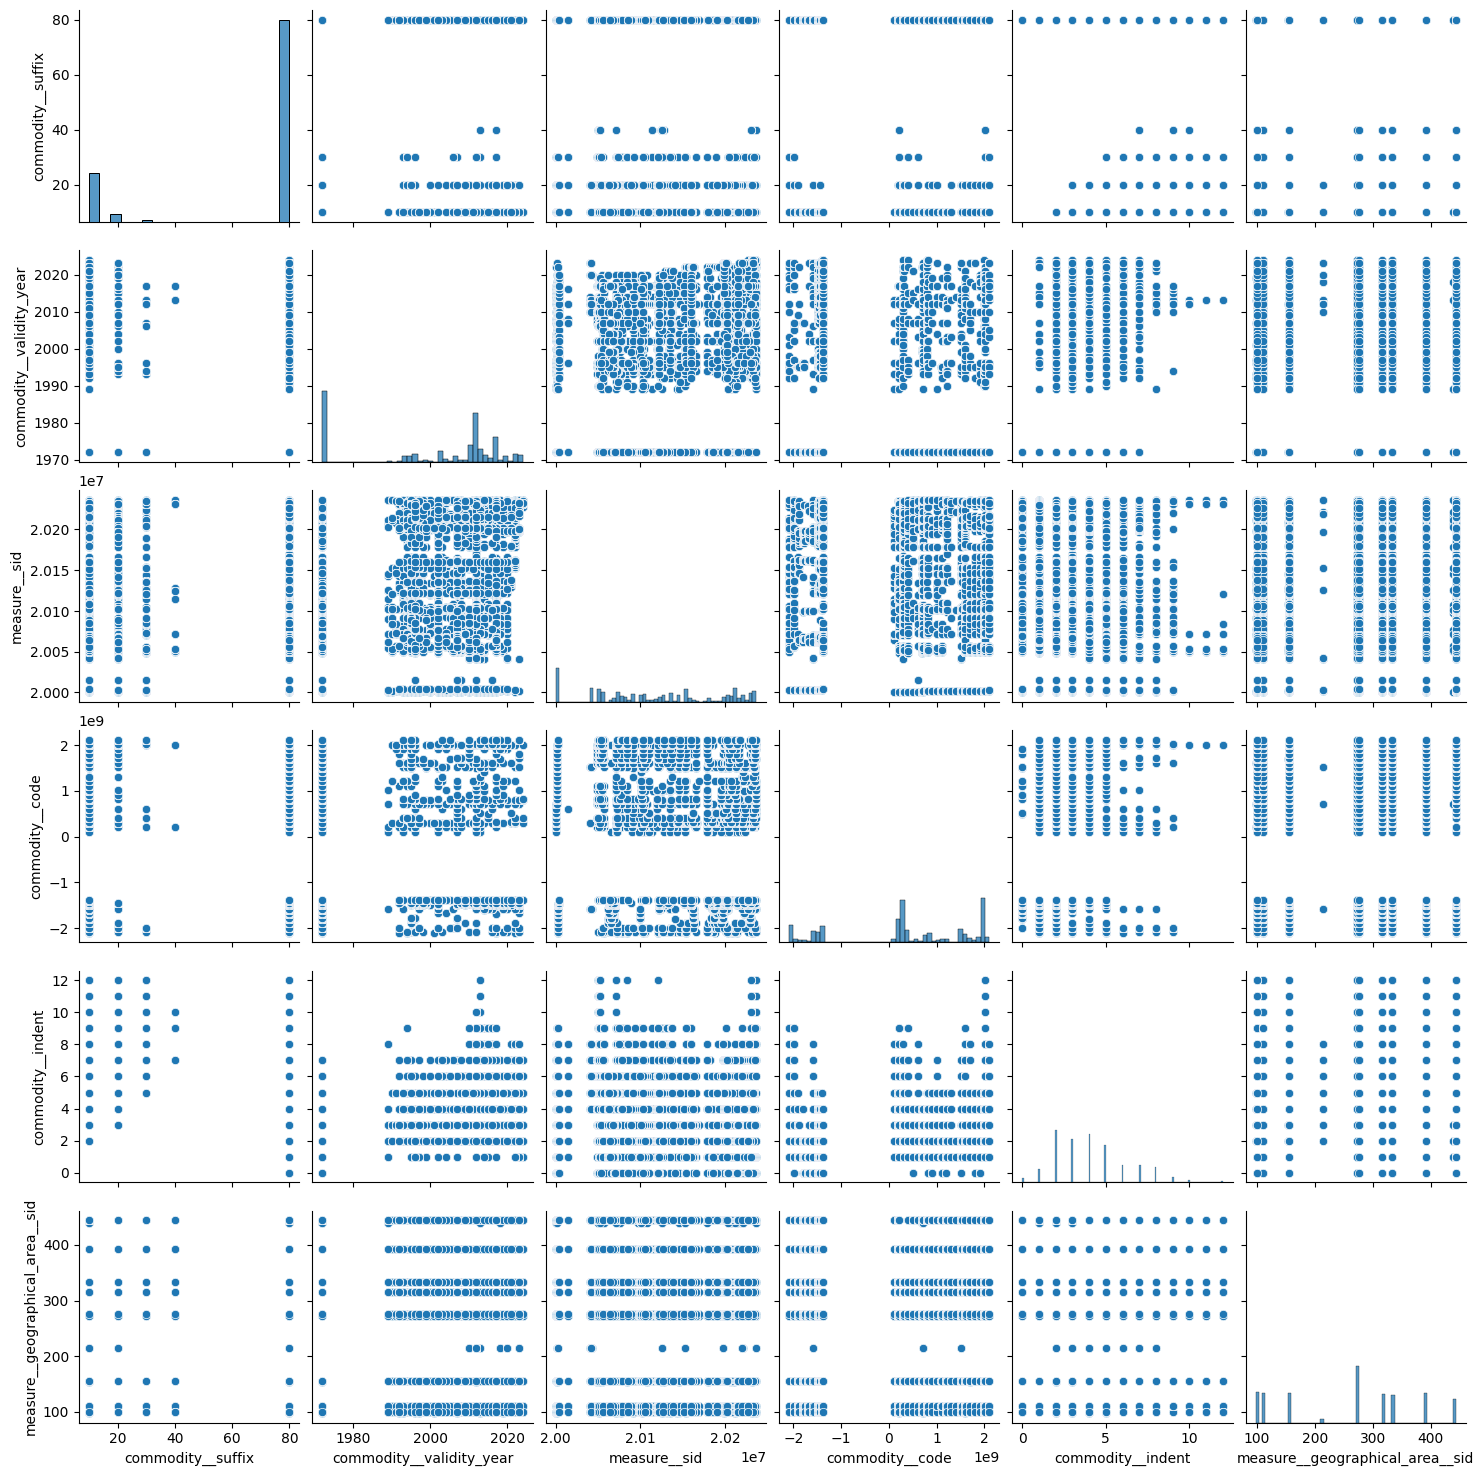

In [ ]:

sns.pairplot(Msc_asia_data[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']])

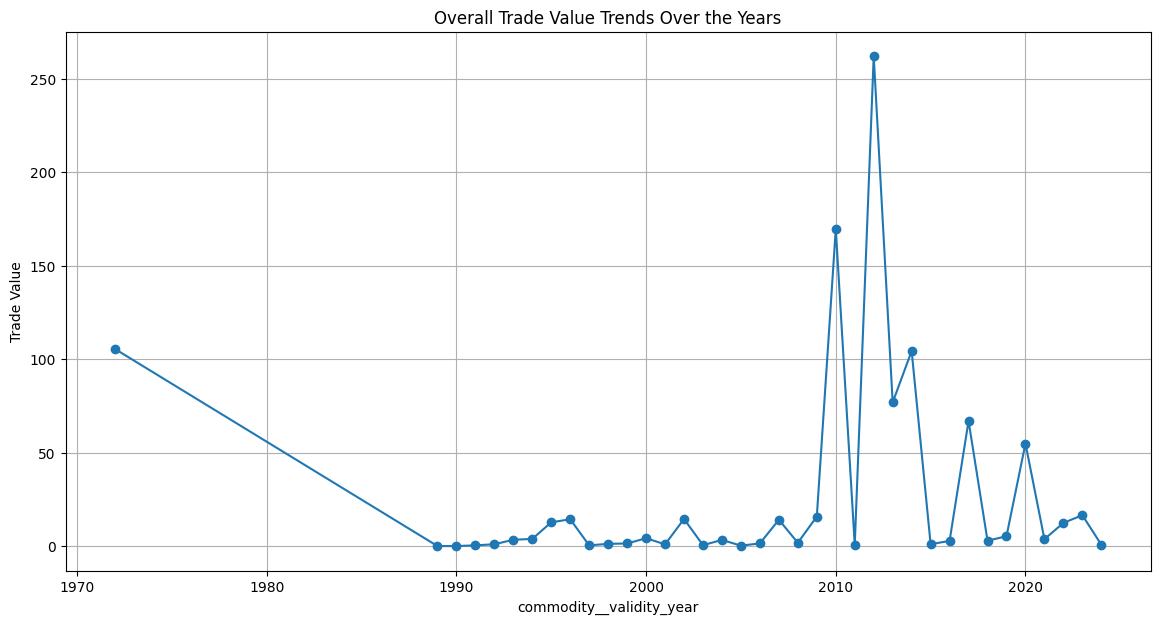

In [ ]:
Msc_asia_data['commodity__validity_year'] = pd.to_datetime(Msc_asia_data['commodity__validity_year'], format='%Y')

#Line Chart - Overall trade value trends over the years
annual_trade_value = Msc_asia_data.groupby(Msc_asia_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

In [ ]:
if 'commodity__validity_year' in Msc_asia_data.columns:
    Msc_asia_data['commodity__validity_year'] = pd.to_datetime(Msc_asia_data['commodity__validity_year'], format='%Y')

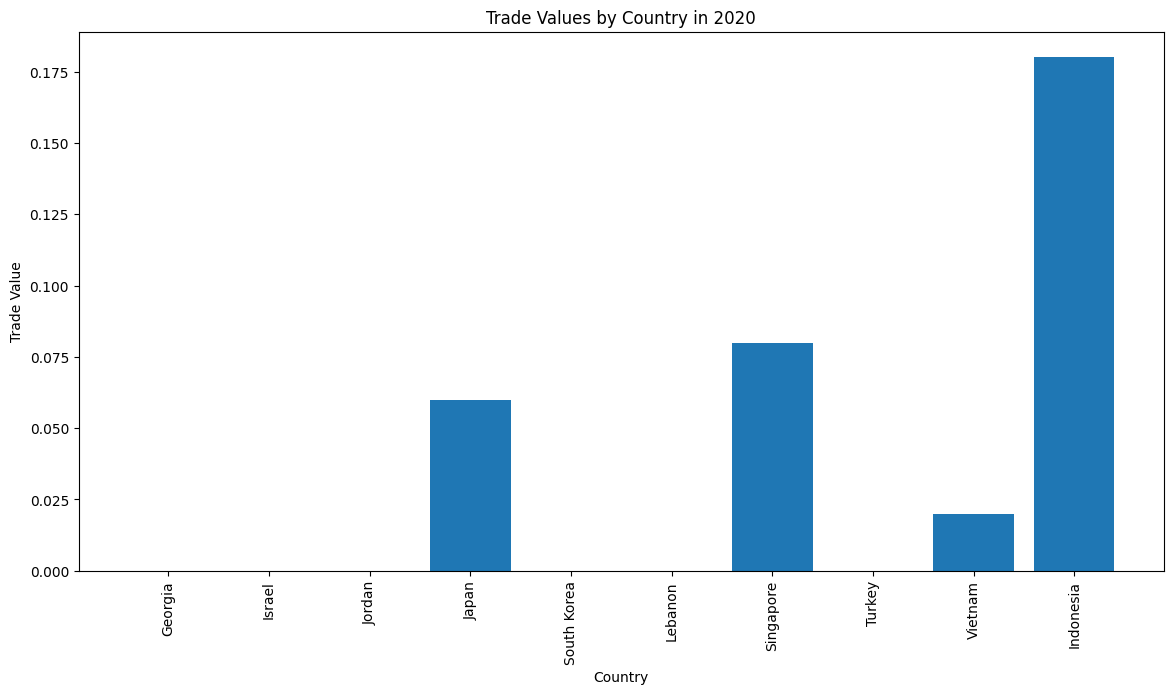

In [ ]:
# 2. Bar Chart: Trade values by country for a specific year
specific_year = 2020
year_data = Msc_asia_data[Msc_asia_data['commodity__validity_year'].dt.year == specific_year]
plt.figure(figsize=(14, 7))
plt.bar(year_data['measure__geographical_area__description'], year_data['measure__duty_expression'])
plt.title(f'Trade Values by Country in {specific_year}')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

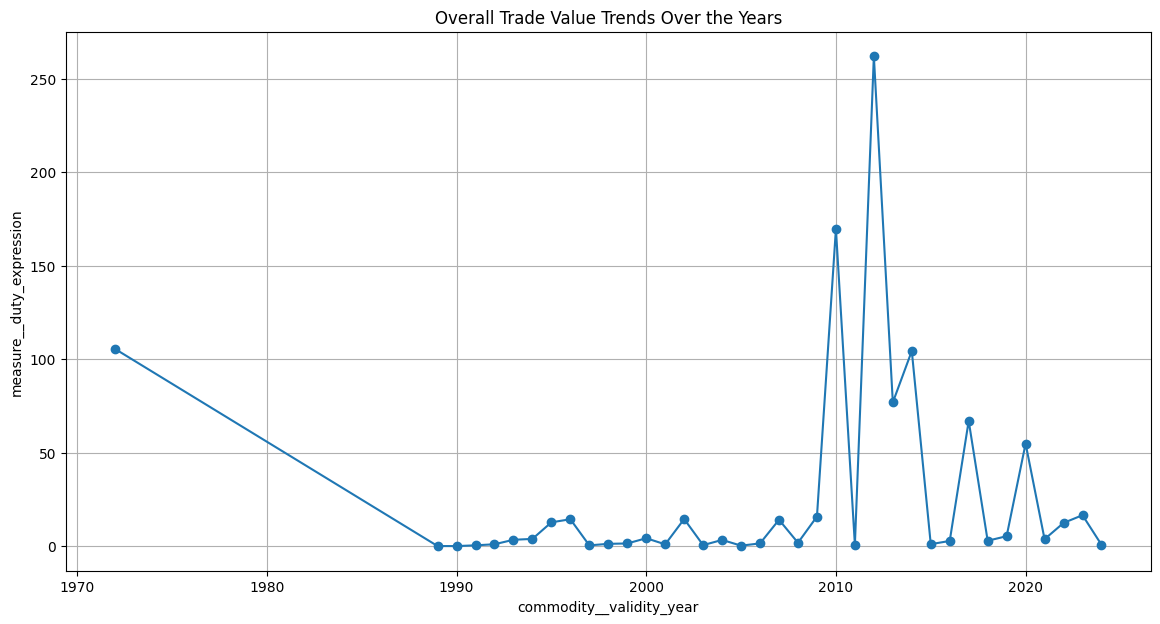

In [ ]:
# 1. Line Chart: Overall trade value trends over the years
annual_trade_value = Msc_asia_data.groupby(Msc_asia_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('measure__duty_expression')
plt.grid(True)
plt.show()

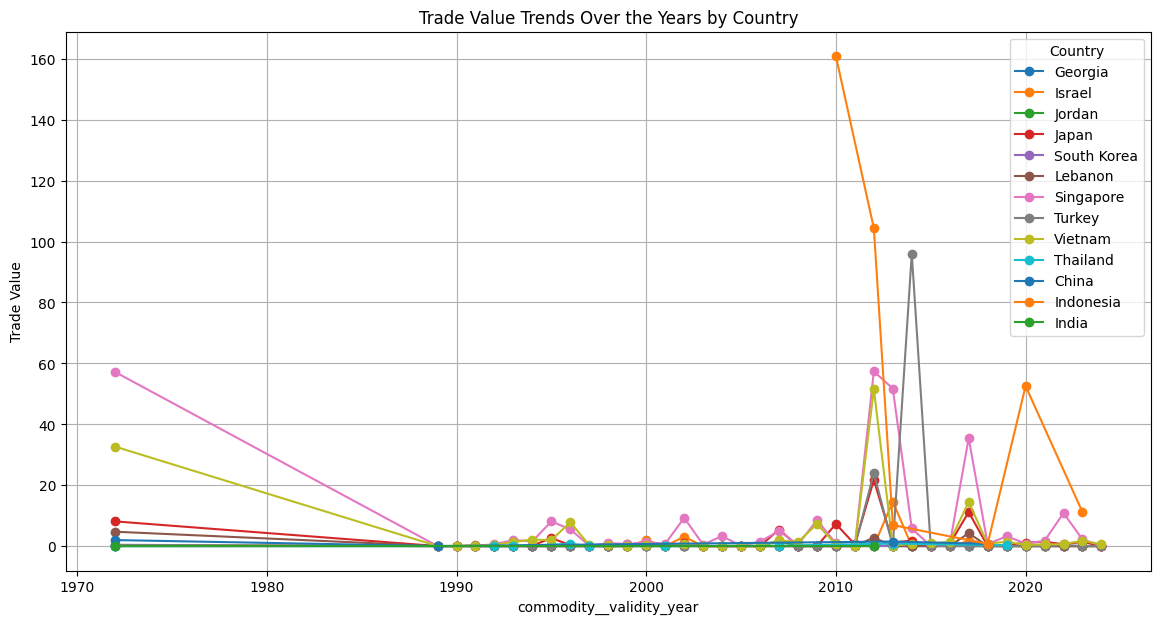

In [ ]:
# 1. Line Chart: Trade value trends over the years for each country
plt.figure(figsize=(14, 7))
for country in Msc_asia_data['measure__geographical_area__description'].unique():
    country_data = Msc_asia_data[Msc_asia_data['measure__geographical_area__description'] == country]
    annual_trade_value = country_data.groupby(country_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=country)
plt.title('Trade Value Trends Over the Years by Country')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

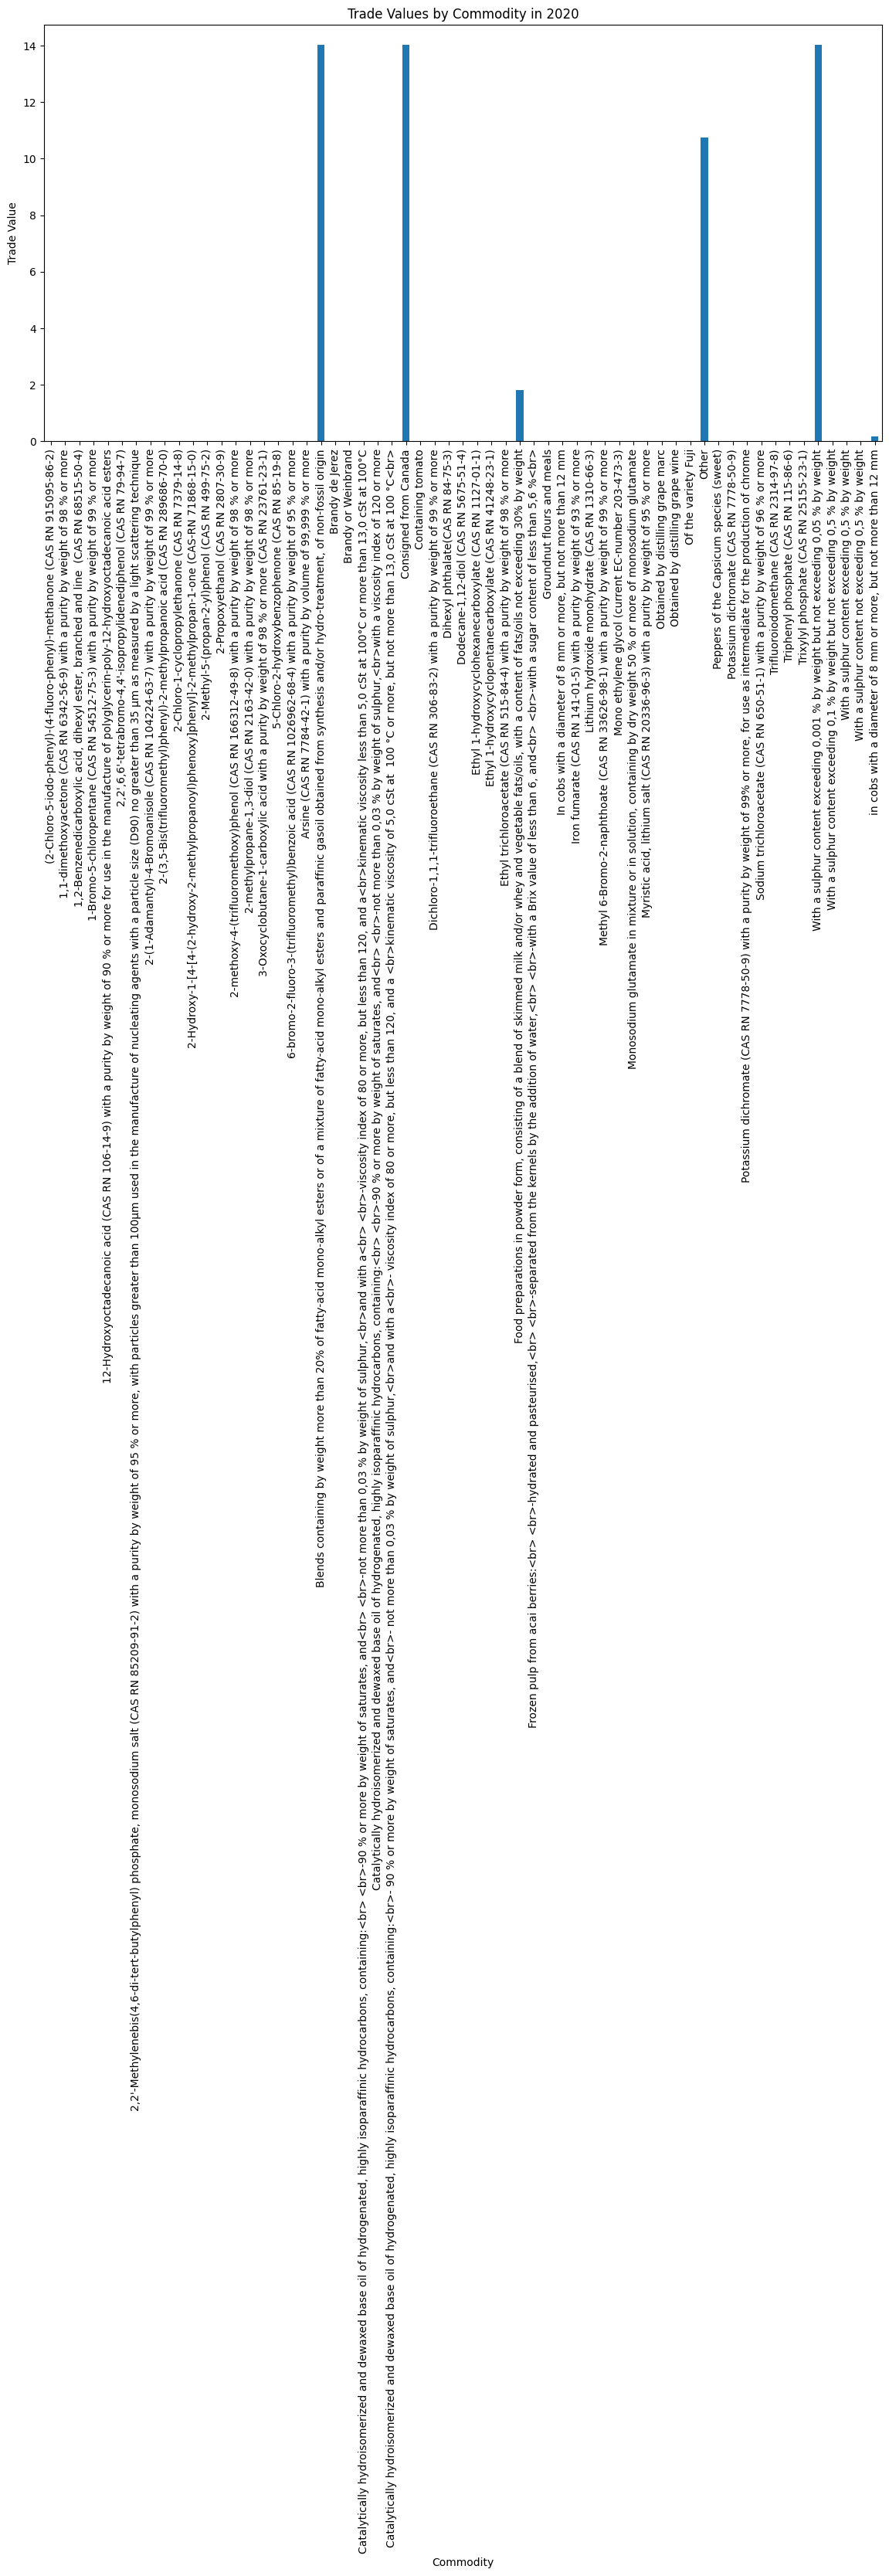

In [ ]:
# 2. Bar Chart: Compare trade values of different commodities for a specific year
specific_year = 2020
year_data = Msc_asia_data[Msc_asia_data['commodity__validity_year'].dt.year == specific_year]
commodity_trade_value = year_data.groupby('commodity__description')['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='bar')
plt.title(f'Trade Values by Commodity in {specific_year}')
plt.xlabel('Commodity')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

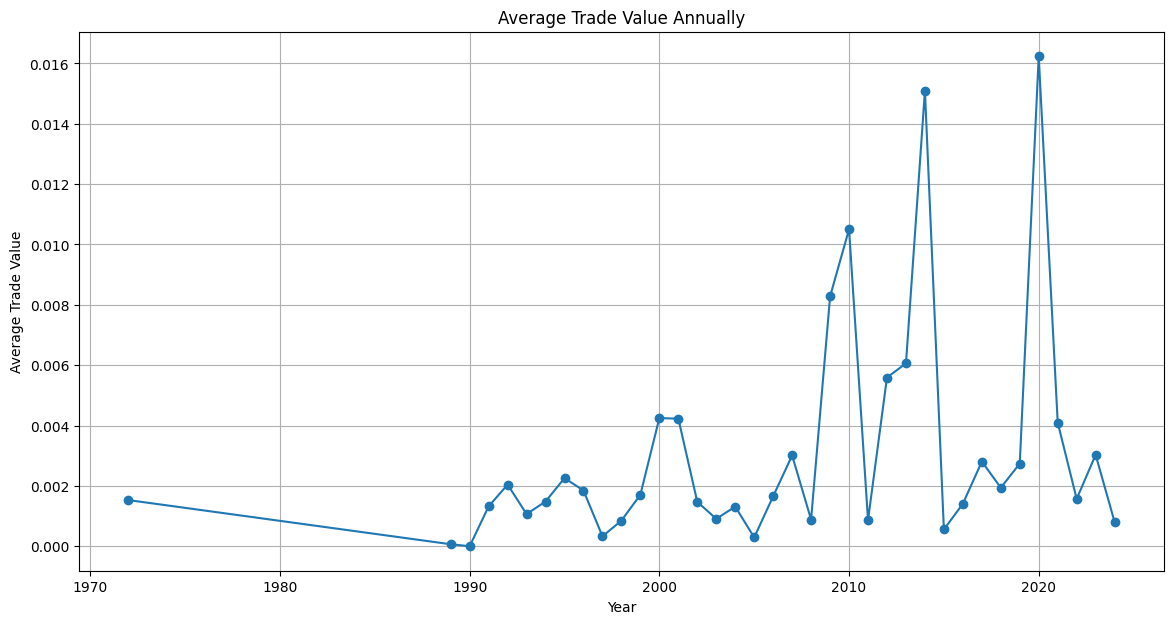

In [ ]:
annual_avg_trade_value = Msc_asia_data.groupby('commodity__validity_year')['measure__duty_expression'].mean()

# Plot the average trade value annually
plt.figure(figsize=(14, 7))
plt.plot(annual_avg_trade_value.index, annual_avg_trade_value.values, marker='o')
plt.title('Average Trade Value Annually')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

In [ ]:
Msc_asia_data['commodity__description'].value_counts().head(12)

commodity__description
Other                                                                                                                                                                      59603
Consigned from Canada                                                                                                                                                       3900
Powdered                                                                                                                                                                    2665
Of the species Oncorhynchus mykiss                                                                                                                                          2520
Of an actual alcoholic strength by volume not exceeding 13 % vol                                                                                                            2364
Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol     

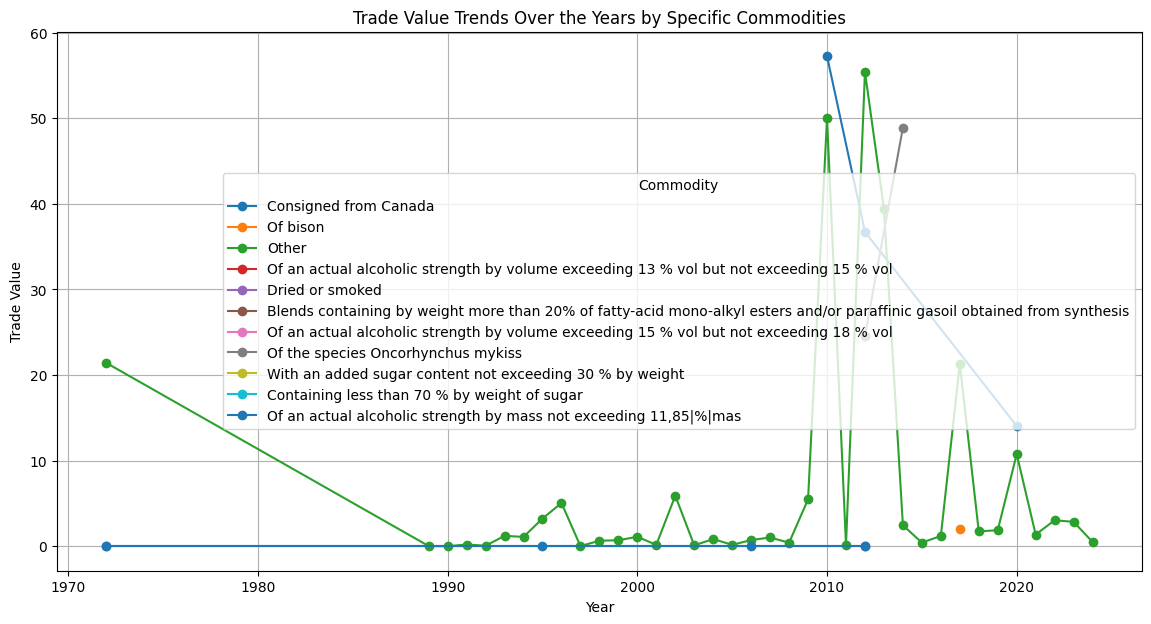

In [ ]:
# List of specific commodities to analyze
commodities_to_analyze = ['Consigned from Canada', 'Of bison', 'Other', 'Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol', 'Dried or smoked', 'Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis', 'Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol', 'Of the species Oncorhynchus mykiss', 'With an added sugar content not exceeding 30 % by weight ', 'Containing less than 70 % by weight of sugar', 'Of an actual alcoholic strength by mass not exceeding 11,85|%|mas']

# Filter data for specific commodities
filtered_df = Msc_asia_data[Msc_asia_data['commodity__description'].isin(commodities_to_analyze)]

# 1. Line Chart: Trade value trends over the years for each specific commodity
plt.figure(figsize=(14, 7))
for commodity in commodities_to_analyze:
    commodity_data = filtered_df[filtered_df['commodity__description'] == commodity]
    annual_trade_value = commodity_data.groupby(commodity_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=commodity)
plt.title('Trade Value Trends Over the Years by Specific Commodities')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

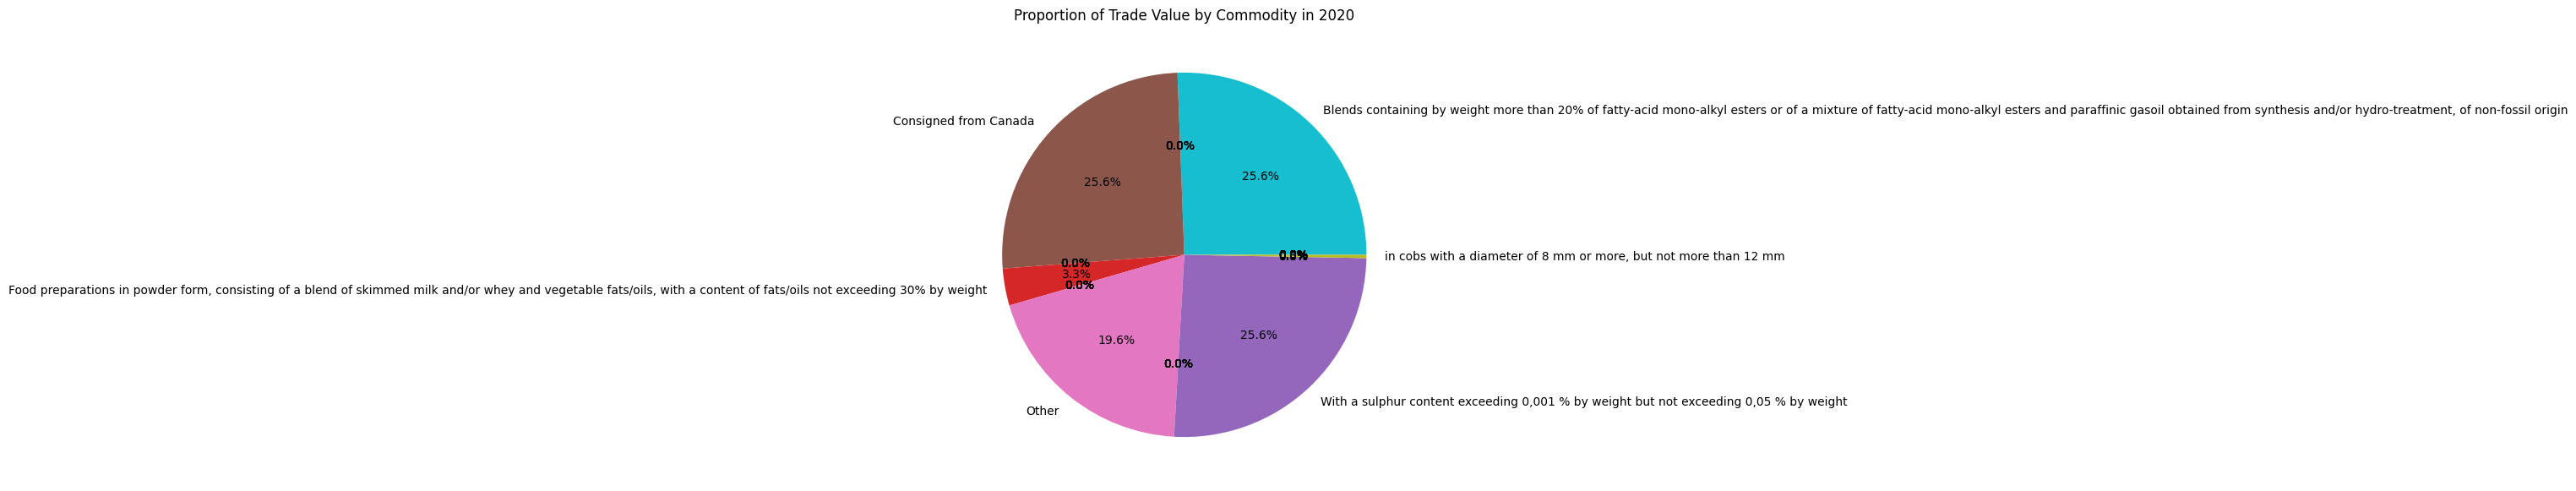

In [ ]:
# Plot 3: Pie Chart - Proportion of trade value by commodity for a specific year
plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Proportion of Trade Value by Commodity in {specific_year}')
plt.ylabel('')
plt.show()

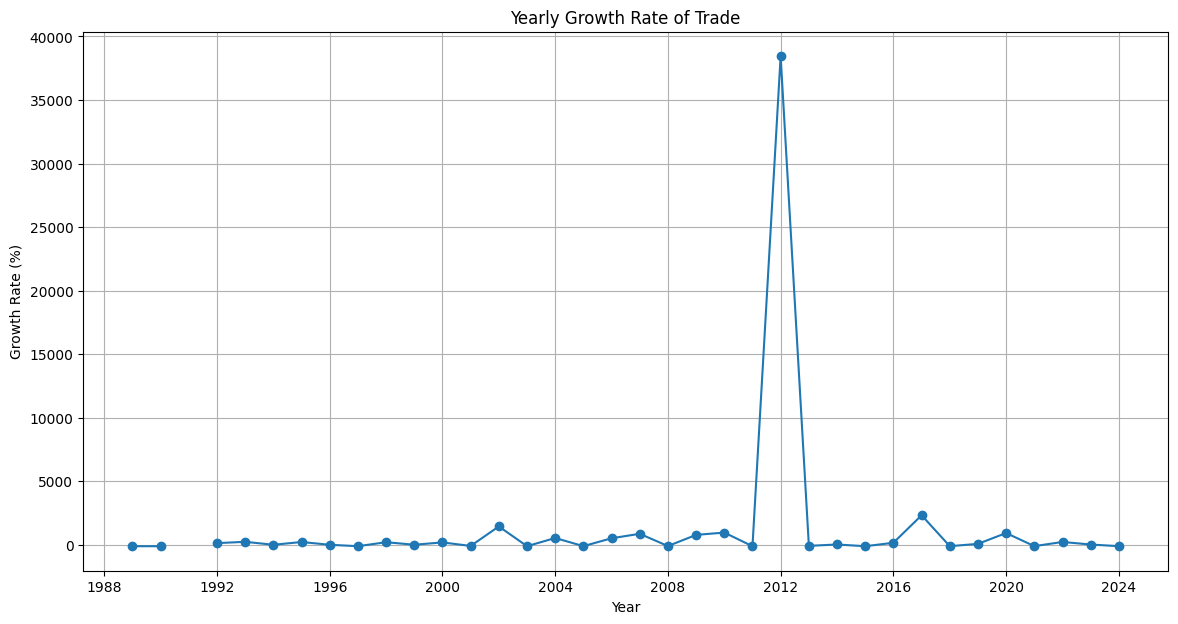

In [ ]:
# Calculate the annual trade value
annual_trade_value = Msc_asia_data.groupby('commodity__validity_year')['measure__duty_expression'].sum()

# Calculate the yearly growth rate
annual_growth_rate = annual_trade_value.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(14, 7))
plt.plot(annual_growth_rate.index, annual_growth_rate.values, marker='o')
plt.title('Yearly Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

In [ ]:
X = Msc_asia_data.drop(columns=['measure__duty_expression'])
y = Msc_asia_data['measure__duty_expression']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define and train the model
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
confusion_matrices = {}
accuracies = {}

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description']

for column in categorical_columns:
    le = LabelEncoder()
    Msc_asia_data[column] = le.fit_transform(Msc_asia_data[column])
    label_encoders[column] = le


In [ ]:
# Encode categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    Msc_asia_data[column] = le.fit_transform(Msc_asia_data[column])

# Select features and target
X = Msc_asia_data.drop(['measure__duty_expression'], axis=1)
y = Msc_asia_data['measure__duty_expression']

# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2}
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,R^2 Score
Linear Regression,0.000276,0.061321
Random Forest Regression,0.000099,0.662341
Gradient Boosting Regression,0.000135,0.540728


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    Msc_asia_data[column] = le.fit_transform(Msc_asia_data[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = Msc_asia_data.drop(columns=['commodity__suffix'])
y = Msc_asia_data['commodity__suffix']

In [ ]:
# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 1.0


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest model Accuracy: {accuracy_knn * 100}')

Random Forest model Accuracy: 99.81405578326502


In [ ]:
# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100}')

k-NN Accuracy: 84.0667799660102


In [ ]:
# Store confusion matrices in a dictionary for easy display
confusion_matrices = {
    'Decision Tree': confusion_matrix_dt,
    'k-NN': confusion_matrix_knn,
    'RF': confusion_matrix_rf
}

In [ ]:
for name, matrix in confusion_matrices.items():
    print(f"{name} Confusion Matrix:\n{matrix}\n")

Decision Tree Confusion Matrix:
[[ 9398     0     0     0     0]
 [    0  1461     0     0     0]
 [    0     0   270     0     0]
 [    0     0     0    28     0]
 [    0     0     0     0 38858]]

k-NN Confusion Matrix:
[[ 4860   192    27     5  4314]
 [  339   640    37     0   445]
 [   54    34    91     0    91]
 [   22     6     0     0     0]
 [ 2149   231    23     0 36455]]

RF Confusion Matrix:
[[ 9346     0     0     0    52]
 [    0  1461     0     0     0]
 [    0     0   270     0     0]
 [    0     0     0    28     0]
 [   41     0     0     0 38817]]



In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


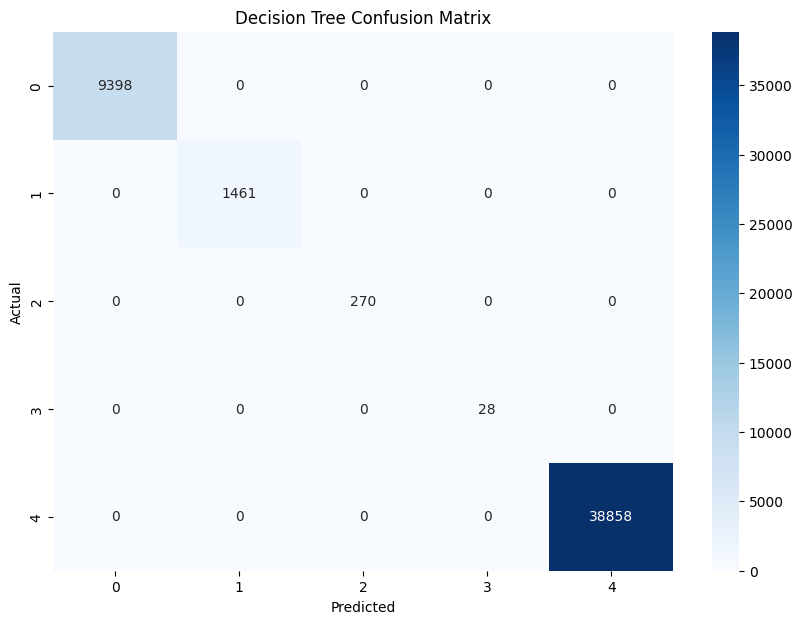

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

Random Forest Model Evaluation:
Accuracy: 0.9981
Precision: 0.9981
Recall: 0.9981
F1 Score: 0.9981


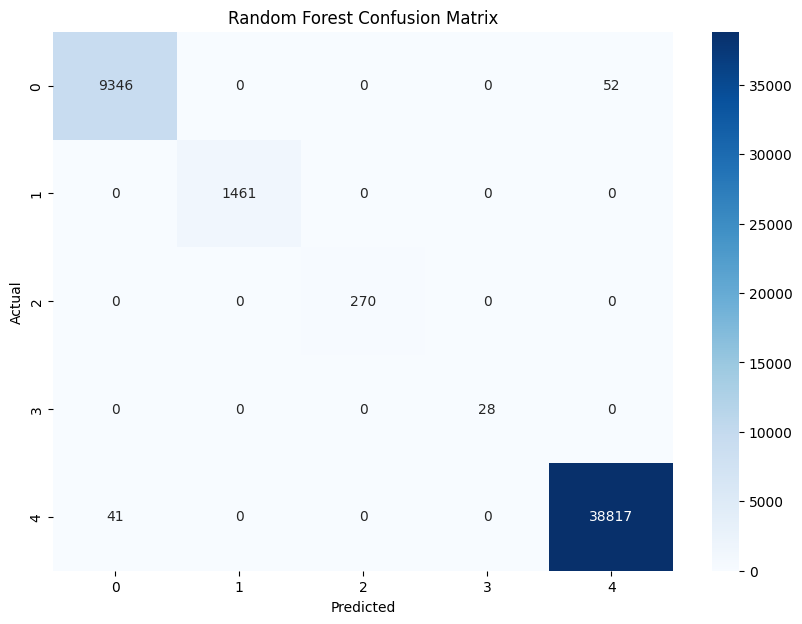

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

k-NN Model Evaluation:
Accuracy: 0.8407
Precision: 0.8284
Recall: 0.8407
F1 Score: 0.8320


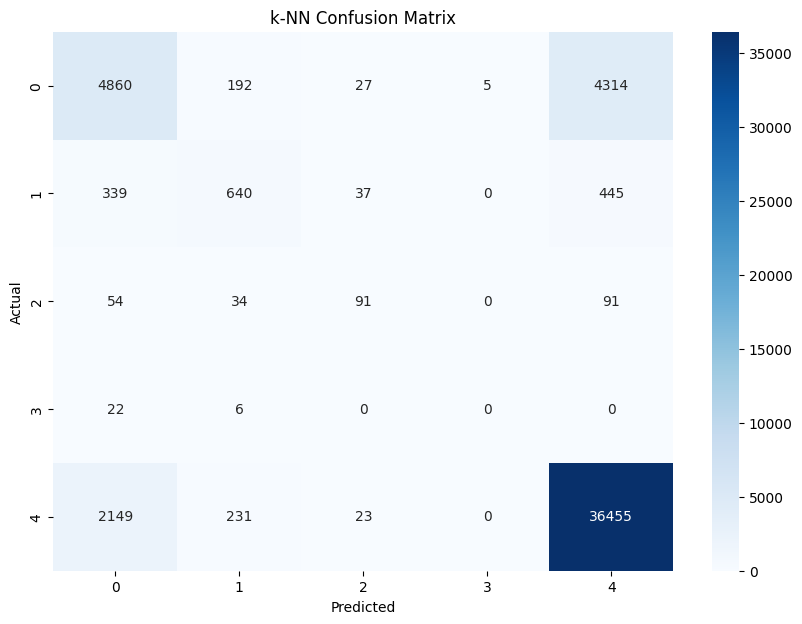

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'k-NN')

In [ ]:
cols = ['commodity__code','measure__duty_expression']
Msc_asia_data1 =  Msc_asia_data[cols]

In [ ]:
WCSS = []
for i in range(1,10):
  kn = KMeans(n_clusters=i)
  kn.fit(Msc_asia_data)
  WCSS.append(kn.inertia_)

In [ ]:
WCSS

[4.608891864872553e+23,
 1.1022467738158311e+23,
 1.6081436731694274e+22,
 1.001317566954746e+22,
 5.451010257908371e+21,
 2.2617267129408616e+21,
 1.559388471924172e+21,
 1.19429335276872e+21,
 8.696761470175417e+20]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

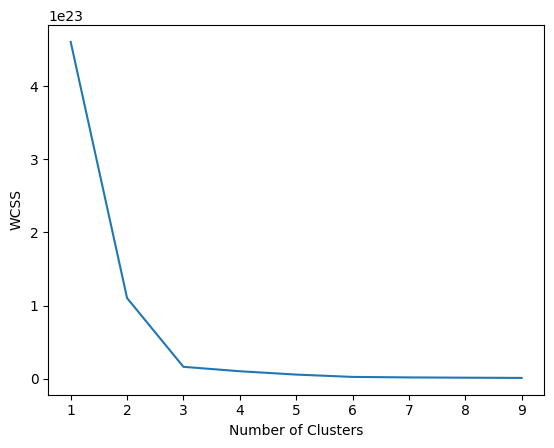

In [ ]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt

In [ ]:
x = Msc_asia_data1.iloc[:,:].values
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(x)

In [ ]:
y_mean

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

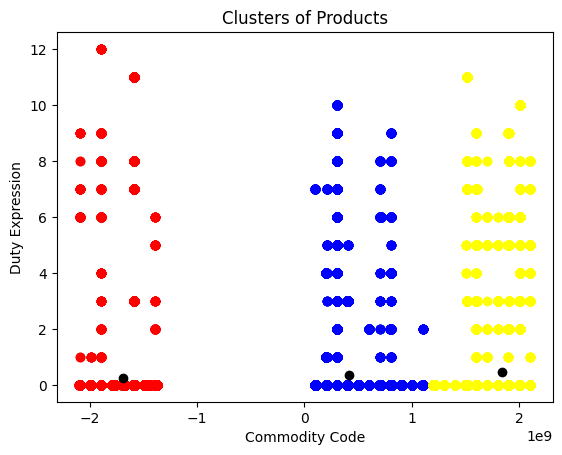

In [ ]:
plt.scatter(x[y_mean == 0,0],x[y_mean == 0,1], color = 'red')
plt.scatter(x[y_mean == 1,0],x[y_mean == 1,1], color = 'blue')
plt.scatter(x[y_mean == 2,0],x[y_mean == 2,1], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Products')
plt.xlabel('Commodity Code')
plt.ylabel('Duty Expression')
plt.show()

In [ ]:
# Select relevant features
selected_columns = [
    'commodity__code',
    'measure__geographical_area__description',
    'measure__duty_expression',
    'commodity__validity_start'
]

In [ ]:
Msc_asia_data_selected = Msc_asia_data[selected_columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
Msc_asia_data['measure__geographical_area__description'] = label_encoder.fit_transform(Msc_asia_data['measure__geographical_area__description'])
Msc_asia_data[['commodity__code', 'measure__duty_expression']] = scaler.fit_transform(Msc_asia_data[['commodity__code', 'measure__duty_expression']])
Msc_asia_data.sort_values('commodity__validity_start', inplace=True)

In [ ]:
# Prepare data for LSTM
sequence_length = 10
def create_sequences(Msc_asia_data, seq_length):
    xs, ys = [], []
    for i in range(len(Msc_asia_data) - seq_length):
        x = Msc_asia_data[i:i+seq_length]
        y = Msc_asia_data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

model_data = Msc_asia_data[['commodity__code', 'measure__geographical_area__description', 'measure__duty_expression']].values
X, y = create_sequences(model_data, sequence_length)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
# Build and train the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(sequence_length, 3)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/50
2501/2501 [==============================] - 131s 47ms/step - loss: 3.1620 - val_loss: 2.5823 - lr: 0.0010
Epoch 2/50
2501/2501 [==============================] - 102s 41ms/step - loss: 2.5131 - val_loss: 2.3574 - lr: 0.0010
Epoch 3/50
2501/2501 [==============================] - 103s 41ms/step - loss: 2.3788 - val_loss: 2.2526 - lr: 0.0010
Epoch 4/50
2501/2501 [==============================] - 105s 42ms/step - loss: 2.2727 - val_loss: 2.1907 - lr: 0.0010
Epoch 5/50
2501/2501 [==============================] - 105s 42ms/step - loss: 2.1700 - val_loss: 2.0486 - lr: 0.0010
Epoch 6/50
2501/2501 [==============================] - 105s 42ms/step - loss: 2.0628 - val_loss: 1.9603 - lr: 0.0010
Epoch 7/50
2501/2501 [==============================] - 112s 45ms/step - loss: 2.0097 - val_loss: 1.9286 - lr: 0.0010
Epoch 8/50
2501/2501 [==============================] - 109s 43ms/step - loss: 1.9742 - val_loss: 1.9425 - lr: 0.0010
Epoch 9/50
2501/2501 [==============================] - 

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


1563/1563 [==============================] - 31s 20ms/step - loss: 1.7111
Test Loss: 1.711072325706482


In [ ]:
# Make predictions
predictions = model.predict(X_test)

1563/1563 [==============================] - 39s 23ms/step


In [ ]:
# Example: Display the first 5 predictions and actual values
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')

Prediction: [0.12273481 5.6314325  0.03252239], Actual: [0.16767114 4.         0.        ]
Prediction: [ 0.17689627 10.260729    0.01730734], Actual: [ 0.15428075 12.          0.        ]
Prediction: [5.5610126e-01 8.6504440e+00 4.7332793e-03], Actual: [0.54865962 9.         0.        ]
Prediction: [ 0.75555086  5.6163397  -0.00978203], Actual: [0.68951216 6.         0.        ]
Prediction: [0.93579376 8.422865   0.01865679], Actual: [0.92844182 9.         0.        ]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Calculate MAE, RMSE, and MAPE
def calculate_metrics(predictions, actuals):
    mae = np.mean(np.abs(predictions - actuals))
    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))

    # Handling division by zero in MAPE calculation
    non_zero_actuals = np.where(actuals != 0, actuals, np.nan)
    mape = np.nanmean(np.abs((predictions - non_zero_actuals) / non_zero_actuals)) * 100

    return mae, rmse, mape

In [ ]:
mae, rmse, mape = calculate_metrics(predictions, y_test)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.5007610058914307
RMSE: 1.308080080074518
MAPE: 6020.406979915007%
